<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/actuales/ICDIC_TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Práctico 4: Regresión Logística

**Objetivos:** Este trabajo tiene como objetivo brindarle al alumno un visión completa del procedimiento para el desarrollo y comparación de modelos de regresión, en particular, los de tipo categórico/clasificación.

**Librerías:** En este trabajo se utilizará

*   Numpy: matemática básica y definición de matrices y vectores; simulación de variables aleatorias
*   Seaborn: construcción de gráficos
*   Bambi: Librería basada en PyMC para la inferencia estadística utilizando cadenas de Markov

También necesitaremos de la librería ArviZ para ver los resultados de nuestra inferencia, al igual que Numpy.

In [ ]:
# Instalación e import de Bambi
try:
  import bambi as bmb
except:
  !pip install bambi
  import bambi as bmb

# Import Arviz para ver los resultados
import arviz as az

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 914.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import io

Grupo:

Integrantes:

*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX

## Ejercicio 1: Clasificación de aguas superficiales de México

En este ejercicio vamos a proponer distintos modelos de regresión para clasificar las aguas superficiales de los principales cuerpos superficiales de México, según su calidad.

### Introducción

La Comisión Nacional del Agua (CONAGUA), a través de la Red Nacional de Medición de Calidad del Agua, realiza el monitoreo de los principales cuerpos de agua de México en sus más de 1723 sitios de muestreo. Los datos que utilizaremos fueron obtenidos desde el siguiente link: https://www.gob.mx/conagua/articulos/calidad-del-agua

### Carga del Dataset

Empecemos abriendo el archivo en Google Colab

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving aguas_superficiales.csv to aguas_superficiales.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['aguas_superficiales.csv']))
df.head()

,Unnamed: 0,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,...,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT,SEMAFORO,GRUPO
0,0,CARMINA 2,CARMINA 2,RÍO BRAVO,COAHUILA DE ZARAGOZA,ACUÑA,RÍO BRAVO 5,DATO PENDIENTE,LÓTICO,ARROYO,...,NaN,NaN,<1,<1,NaN,NaN,NaN,NaN,Amarillo,LOTICO
1,1,DLAGU0001RNL21,PRESA NATILLAS DE ABAJO,LERMA SANTIAGO PACÍFICO,AGUASCALIENTES,COSIO,RÍO SAN PEDRO,PRESA NATILLAS DE ABAJO,LÉNTICO,PRESA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rojo,LENTICO
2,2,DLAGU0002RNL21,PRESA EL JOCOQUI,LERMA SANTIAGO PACÍFICO,AGUASCALIENTES,RINCÓN DE ROMOS,RÍO SAN PEDRO,PRESA EL JOCOQUI,LÉNTICO,PRESA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,LENTICO
3,3,DLAGU0003RNL21,BORDO SANTA ELENA CORTINA,LERMA SANTIAGO PACÍFICO,AGUASCALIENTES,AGUASCALIENTES,PRESA EL NIÁGARA,PRESA SANTA ELENA,LÉNTICO,PRESA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rojo,LENTICO
4,4,DLAGU0004RNL21,HUMEDAL BUENAVISA DE PEÑUELAS CHARCA NO. 5,LERMA SANTIAGO PACÍFICO,AGUASCALIENTES,AGUASCALIENTES,PRESA AJOJUCAR,HUMEDAL BUENAVISA,LÉNTICO,HUMEDAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rojo,LENTICO


Observemos las columnas del dataset:

In [ ]:
df.columns

Index(['Unnamed: 0', 'CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO',
       'MUNICIPIO', 'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD',
       'LATITUD', 'PERIODO', 'DBO_mg/L', 'DQO_mg/L', 'SST_mg/L',
       'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL', 'ENTEROC_NMP_100mL',
       'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT',
       'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_D_48_FON_UT',
       'TOX_FIS_SUP_15_UT', 'TOX_FIS_FON_15_UT', 'SEMAFORO', 'GRUPO'],
      dtype='object')

Este contiene, además de la información geográfica de las estaciones de muestreo, resultados de ensayos de calidad del agua, siendo sus variables:
- **Demanda Bioquímica de Oxígeno a cinco días: DBO**
- **Demanda Química de Oxígeno: DQO**
- **Sólidos Suspendidos Totales: SST**
- **Coliformes fecales: CF**
- **Escherichia coli: E_COLI**
- **Enterococos fecales: ENTEROC_FEC**
- **Porcentaje de saturación de Oxígeno Disuelto: OD**
- **Toxicidad aguda: TOX**

En base en estos indicadores, se clasifica el agua según su calidad, siguiendo una escala de tipo **semáforo** que considera 3 colores: **verde, amarillo y rojo**, correspondientes a buena calidad, aceptable y contaminada, respectivamente.

In [ ]:
# Cantidad de aguas de cada categoría:
df['SEMAFORO'].value_counts()

SEMAFORO
Verde       2326
Amarillo    2076
Rojo        1823
Name: count, dtype: int64

### Análisis Exploratorio de Datos

En primer lugar, vamos a analizar los datos y a limpiarlos, para luego desarrollar el modelo.

Nosotros trabajaremos con las aguas de tipo **lótico**. Además, conservaremos únicamente las columnas relacionadas con la calidad de agua (no los datos geográficos).

In [ ]:
df = df[df['GRUPO'] == 'LOTICO']

In [ ]:
# Selección de variables sobre calidad del agua de tipo lotico
df = df[['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'COLI_FEC_NMP_100mL','E_COLI_NMP_100mL',
         'ENTEROC_NMP_100mL', 'OD_PORC', 'TOX_D_48_UT', 'TOX_V_15_UT', 'SEMAFORO']].copy()

# Renombrar columnas
df.rename(columns={'DBO_mg/L': 'DBO',
                    'DQO_mg/L': 'DQO',
                    'SST_mg/L': 'SST',
                    'COLI_FEC_NMP_100mL': 'COLI',
                    'E_COLI_NMP_100mL': 'E_COLI',
                    'ENTEROC_NMP_100mL': 'ENTEROC',
                    'OD_PORC': 'OD',
                    'TOX_D_48_UT': 'TOX_D',
                    'TOX_V_15_UT': 'TOX_V'
                     },
            inplace=True)

#### Actividad 1

Utilizando `.info()`, vamos a analizar si el tipo de dato es el esperado: por ejemplo si la columna que deben contener textos, efectivamente sea de tipo `object` y las numéricas, `float` o `interger`, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3372 entries, 0 to 6224
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DBO       3230 non-null   object
 1   DQO       3241 non-null   object
 2   SST       3218 non-null   object
 3   COLI      3234 non-null   object
 4   E_COLI    3159 non-null   object
 5   ENTEROC   43 non-null     object
 6   OD        3227 non-null   object
 7   TOX_D     3121 non-null   object
 8   TOX_V     3112 non-null   object
 9   SEMAFORO  3372 non-null   object
dtypes: object(10)
memory usage: 289.8+ KB


**Actividad**: Utilizando `replace()` haga las moficaciones que sean necesarias en los valores y convierta el tipo de dato.

NOTA: A fines del trabajo práctico, si un dato es indicado como `menor a X` asuma que vale directamente X. Para ver una forma más compleja de considerar datos censurados puede ver los ejercicios resueltos en las clases prácticas.

In [ ]:
# Limpieza
# CODIGO DEL ALUMNO ############################################################








################################################################################
df.info()

**Pregunta:** ¿Existe una variable que no merece la pena incluir debido a la cantidad de datos?

**Respuesta:**

#### Actividad 2

**Actividad**: Defina una lista llamada `feature_corr` con los headers de las variables de interés que han sobrevivido y realice un heatmap con su correlación.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
feature_corr =

################################################################################
plt.show()


**Pregunta**: Observando el gráfico, ¿se quedaría con todas las variables para ajustar un modelo?

**Su Repuesta:**

#### Actividad 3

**Actividad**: Para observar las relaciones entre variables en forma detallada, realice gráficos de puntos utilizando `sns.pairplot()`.

Defina una lista `columns` con las variables a considerar en el pair plot. Verá que los resultados están mostrados en escala logarítmica.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
columns =
################################################################################

pairplot = sns.pairplot(df[columns], hue='SEMAFORO')

for ax in pairplot.axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')

plt.show()

**Pregunta**: ¿Observa algo en particular?

**Su Respuesta**:

#### Actividad 4

**Actividad**: En el DataFrame `df_new` coloque los headers de las columnas que serán sus variables y remueva los valores nulos. Luego analice el resultado que muestra `.describe()`.

In [ ]:
# Defina df_new
# CODIGO DEL ALUMNO ############################################################
df_new =
################################################################################


# Remueva valores nulos
# CODIGO DEL ALUMNO ############################################################

################################################################################

df_new.describe()

**Pregunta**: ¿Qué puede decir de la tabla anterior? Analice dispersiones, valores medios y extremos entre las variables, y rangos de valores.

**Su Respuesta:**

#### Actividad 5

Utilizando `sns.stripplot()` vamos a observar cómo se distribuyen las muestras según la categoría y la variable de calidad.

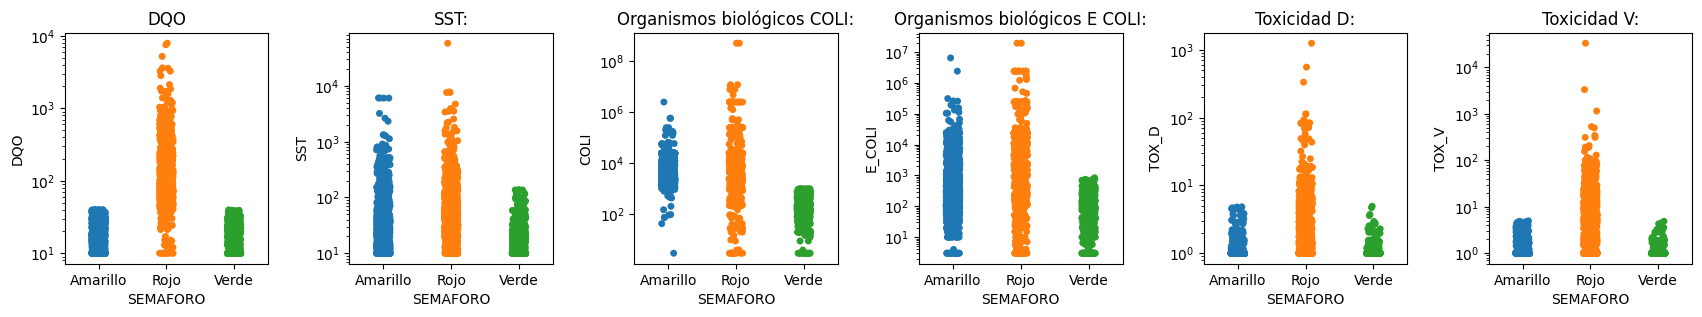

In [ ]:
# Gráficos
fig, axes = plt.subplots(1, 6, figsize=(21,3))

sns.stripplot(data=df_new, x='SEMAFORO', y='DQO', hue='SEMAFORO', ax=axes[0]).set(title='DQO')
sns.stripplot(data=df_new, x='SEMAFORO', y='SST', hue='SEMAFORO', ax=axes[1]).set(title='SST:')
sns.stripplot(data=df_new, x='SEMAFORO', y='COLI', hue='SEMAFORO', ax=axes[2]).set(title='Organismos biológicos COLI:')
sns.stripplot(data=df_new, x='SEMAFORO', y='E_COLI', hue='SEMAFORO', ax=axes[3]).set(title='Organismos biológicos E COLI:')
sns.stripplot(data=df_new, x='SEMAFORO', y='TOX_D', hue='SEMAFORO', ax=axes[4]).set(title='Toxicidad D:')
sns.stripplot(data=df_new, x='SEMAFORO', y='TOX_V', hue='SEMAFORO', ax=axes[5]).set(title='Toxicidad V:')

for ax in axes:
    ax.set_yscale('log')

fig.subplots_adjust(wspace=0.4)
plt.show()

A continuación, construimos para ustedes una función par la eliminación de outliers del dataset, en particular estas responden a aguas altamente contaminadas que no queremos analizar en este momento (no necesitamos un modelo que nos lo diga).

In [ ]:
# Funcion para remover outliers superiores:

def remove_outliers(columns, df, quantile_low=0.05, quantile_high=0.95, multiplier=1.5):

    df_filtered = df.copy()

    for col in columns:
        Q1 = df_filtered[col].quantile(quantile_low)
        Q3 = df_filtered[col].quantile(quantile_high)
        IQR = Q3 - Q1

        upper_bound = Q3 + multiplier * IQR
        # Si quisieramos remover inferiores también
        #lower_bound = Q1 - multiplier * IQR

        df_filtered = df_filtered[(df_filtered[col] <= upper_bound)]
        #df_filtered = df_filtered[(df_filtered[col] <= upper_bound) & (df_filtered[col] >= lower_bound)]

    return df_filtered

**Actividad**: Para eliminar valores extremos de aguas altamente contaminadas, defina `features` como una lista con los headers las columnas que serán sus variables.



In [ ]:
# Definimos la lista features con las variables explicativas del modelo
# CODIGO DEL ALUMNO ############################################################
features =
################################################################################

# Aplicamos la funcion recien definida
df_new_filtered = remove_outliers(features, df_new)
df_new_filtered.head()

**Actividad**: A continuación, repetiremos los gráficos anteriores pero esta vez, con los datos filtrados.

In [ ]:
# Gráficos
fig, axes = plt.subplots(1, 6, figsize=(21,3))

# CODIGO DEL ALUMNO ############################################################








################################################################################

for ax in axes:
    ax.set_yscale('log')

fig.subplots_adjust(wspace=0.4)
plt.show()

#### Actividad 6

**Actividad**: Utilice `.describe()` para observar los datos hasta el momento.

In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################

**Pregunta**: En conjunto con los gráficos de la Actividad 5, ¿nota algo que podría llegar a perjudicar la convergencia o la velocidad de la corrida de los modelos que usted genere?

**Su Respuesta:**

### Datos de entrenamiento y de testeo

Antes de desarrollar los modelos, vamos a separar los datos en 2: uno para entrenar el modelo y el otro, para testearlo:

In [ ]:
import random

def split_data(df, train_size=0.8, random_state=42):
    random.seed(random_state)

    data = df.values.tolist()
    headers = df.columns.tolist()

    random.shuffle(data)
    index = int(len(data) * train_size)

    data_train = data[:index]
    data_test = data[index:]

    df_train = pd.DataFrame(data_train, columns=headers)
    df_test = pd.DataFrame(data_test, columns=headers)

    return df_train, df_test

# Corremos la función:
df_train, df_test = split_data(df=df_new_filtered, train_size=0.8, random_state=42)

df_train.head()

### Propuesta y comparación de modelos de regresión

En esta parte del trabajo, propondremos distintos modelos para clasificar las aguas superficiales de México. Estos modelos serán **categóricos** pero tendremos que seleccionar las variables explicativas.

**El objetivo es encontrar el mejor modelo con una única variable, y el mejor modelo con la cantidad de variables deseadas.**

Si bien nosotros les dejamos los bloques de código para que muestres 5 modelos, **esto no quiere decir que sólo hay que haber corrido 5 modelos y entregado el trabajo, sino que deben mostrarse los 5 mejores modelos que se obtuvieron.**


**Atención:** Recuerden verificar que las cadenas converjan, de lo contrario, deberás hacer los ajustes necesarios.

Por otro lado, para poder comparar la complejidad de los modelos, usaremos las funciones `time()` para registrar los tiempos de ejecución y la función `measure_resources()` para medir los recursos de la computadora.

In [ ]:
import time
import psutil

# Función para medir los recursos
def measure_resources():
    process = psutil.Process()
    cpu_times = process.cpu_times()
    memory_info = process.memory_info()
    return cpu_times, memory_info

#### Modelo 1

A modo de ejemplo, a continuación se muetra un modelo simple con una única variable explicativa: **DQO**.

Note que en el modelo se utiliza `log(DQO)` para hacer que los datos se ajusten mejor a lo que venimos haciendo en el EDA. Llamaremos `model_1` al modelo y `fitted_1` a los resultados

In [ ]:
# Definir el modelo
model_1 = bmb.Model('SEMAFORO ~ log(DQO)', df_train, family="categorical")

In [ ]:
# Medir los recursos y el tiempo de inicio antes de ajustar el modelo
cpu_times_start, memory_info_start = measure_resources()
start_time = time.time()

# Ajustar el modelo
fitted_1 = model_1.fit(chains=2,
                       draws=4000, tune=4000,
                       random_seed=42,
                       idata_kwargs={"log_likelihood": True},
                       nuts={"target_accept":0.8})

# Medir el tiempo y los recursos luego de ajustar el modelo
end_time = time.time()
cpu_times_end, memory_info_end = measure_resources()

# Calcular la diferencia entre inicio y fin:
execution_time = end_time - start_time
cpu_time_used = cpu_times_end.user - cpu_times_start.user
memory_used = memory_info_end.rss - memory_info_start.rss

# Mostrar
print(f"Tiempo de ejecución: {execution_time} segundos")
print(f"Tiempo de CPU utilizado: {cpu_time_used} segundos")
print(f"Memoria utilizada: {memory_used / (1024 ** 2)} MB")

Tiempo de ejecución: 181.5718891620636 segundos
Tiempo de CPU utilizado: 117.5 segundos
Memoria utilizada: 184.3828125 MB


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


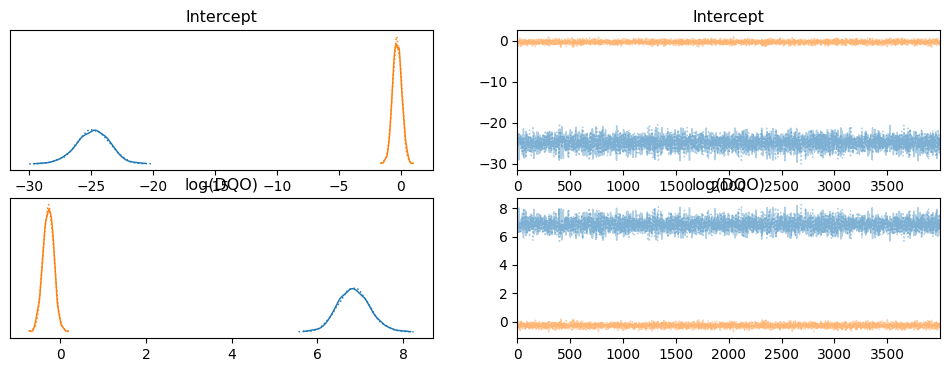

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept[Rojo],-24.867,1.347,-27.422,-22.333,0.020,0.014,4636.0,4314.0,1.0
Intercept[Verde],-0.310,0.363,-0.978,0.377,0.005,0.004,5655.0,5394.0,1.0
log(DQO)[Rojo],6.849,0.372,6.169,7.567,0.005,0.004,4782.0,4558.0,1.0
log(DQO)[Verde],-0.274,0.127,-0.520,-0.043,0.002,0.001,5148.0,5230.0,1.0


In [ ]:
# Diagnóstico de la Cadena
az.plot_trace(fitted_1);
plt.show()

# Resumen de la inferencia
az.summary(fitted_1)

#### Modelo 2

##### Actividad 7

**Actividad**: Cargue en Bambi el modelo de regresión propuesto y muestre claramente la evaluación de la inferencia/convergencia. Llamaremos `model_2` al modelo y `fitted_2` a los resultados

In [ ]:
# Definir el modelo
# CODIGO DEL ALUMNO ############################################################
model_2 =
################################################################################

In [ ]:
# Medir los recursos y el tiempo de inicio antes de ajustar el modelo
cpu_times_start, memory_info_start = measure_resources()
start_time = time.time()

# Ajustar el modelo
# CODIGO DEL ALUMNO ############################################################
fitted_2 =
################################################################################

# Medir el tiempo y los recursos luego de ajustar el modelo
end_time = time.time()
cpu_times_end, memory_info_end = measure_resources()

# Calcular la diferencia entre inicio y fin:
execution_time = end_time - start_time
cpu_time_used = cpu_times_end.user - cpu_times_start.user
memory_used = memory_info_end.rss - memory_info_start.rss

print(f"Tiempo de ejecución: {execution_time} segundos")
print(f"Tiempo de CPU utilizado: {cpu_time_used} segundos")
print(f"Memoria utilizada: {memory_used / (1024 ** 2)} MB")

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

#### Modelo 3

##### Actividad 8
**Actividad**:  Cargue en Bambi el modelo de regresión propuesto y muestre claramente la evaluación de la inferencia/convergencia. Llamaremos `model_3` al modelo y `fitted_3` a los resultados

In [ ]:
# Definir el modelo
# CODIGO DEL ALUMNO ############################################################
model_3 =
################################################################################

In [ ]:
# Medir los recursos y el tiempo de inicio antes de ajustar el modelo
cpu_times_start, memory_info_start = measure_resources()
start_time = time.time()

# Ajustar el modelo
# CODIGO DEL ALUMNO ############################################################
fitted_3 =
################################################################################

# Medir el tiempo y los recursos luego de ajustar el modelo
end_time = time.time()
cpu_times_end, memory_info_end = measure_resources()

# Calcular la diferencia entre inicio y fin:
execution_time = end_time - start_time
cpu_time_used = cpu_times_end.user - cpu_times_start.user
memory_used = memory_info_end.rss - memory_info_start.rss

print(f"Tiempo de ejecución: {execution_time} segundos")
print(f"Tiempo de CPU utilizado: {cpu_time_used} segundos")
print(f"Memoria utilizada: {memory_used / (1024 ** 2)} MB")

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

#### Modelo 4

##### Actividad 9
**Actividad**:  Cargue en Bambi el modelo de regresión propuesto y muestre claramente la evaluación de la inferencia/convergencia. Llamaremos `model_4` al modelo y `fitted_4` a los resultados

In [ ]:
# Definir el modelo
# CODIGO DEL ALUMNO ############################################################
model_4 =
################################################################################

In [ ]:
# Medir los recursos y el tiempo de inicio antes de ajustar el modelo
cpu_times_start, memory_info_start = measure_resources()
start_time = time.time()

# Ajustar el modelo
# CODIGO DEL ALUMNO ############################################################
fitted_4 =
################################################################################

# Medir el tiempo y los recursos luego de ajustar el modelo
end_time = time.time()
cpu_times_end, memory_info_end = measure_resources()

# Calcular la diferencia entre inicio y fin:
execution_time = end_time - start_time
cpu_time_used = cpu_times_end.user - cpu_times_start.user
memory_used = memory_info_end.rss - memory_info_start.rss

print(f"Tiempo de ejecución: {execution_time} segundos")
print(f"Tiempo de CPU utilizado: {cpu_time_used} segundos")
print(f"Memoria utilizada: {memory_used / (1024 ** 2)} MB")

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

#### Modelo 5

##### Actividad 10

**Actividad**:  Cargue en Bambi el modelo de regresión propuesto y muestre claramente la evaluación de la inferencia/convergencia. Llamaremos `model_5` al modelo y `fitted_5` a los resultados

In [ ]:
# Definir el modelo
# CODIGO DEL ALUMNO ############################################################
model_5 =
################################################################################

In [ ]:
# Medir los recursos y el tiempo de inicio antes de ajustar el modelo
cpu_times_start, memory_info_start = measure_resources()
start_time = time.time()

# Ajustar el modelo
# CODIGO DEL ALUMNO ############################################################
fitted_5 =
################################################################################

# Medir el tiempo y los recursos luego de ajustar el modelo
end_time = time.time()
cpu_times_end, memory_info_end = measure_resources()

# Calcular la diferencia entre inicio y fin:
execution_time = end_time - start_time
cpu_time_used = cpu_times_end.user - cpu_times_start.user
memory_used = memory_info_end.rss - memory_info_start.rss

print(f"Tiempo de ejecución: {execution_time} segundos")
print(f"Tiempo de CPU utilizado: {cpu_time_used} segundos")
print(f"Memoria utilizada: {memory_used / (1024 ** 2)} MB")

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

#### Comparación de Modelos

##### Actividad 11

**Actividad**: Compare los modelos mediante LOO-CV, y seleccione el que considera mejor en función de su diferencia de capacidad predictiva y otros conceptos que crea importantes (cantidad de parámetros, diagnóstico, etc.). Además, no olvide considerar el tiempo de ejecución, memoria y poder de cómputo requerido para entrenar los modelos.

In [ ]:
# Comparación de modelos
# CODIGO DEL ALUMNO ############################################################
models_dict =
az_comp_loo =
################################################################################
az_comp_loo

In [ ]:
# Gráfico
# CODIGO DEL ALUMNO ############################################################

################################################################################

**Pregunta**: ¿Cuál es el modelo más adecuado y por qué? Justifique su respuesta.

**Su Respuesta**:

### Análisis del modelo seleccionado

#### Actividad 12

A continuación, se mostrará el código para evaluar cómo funciona el modelo para el `model_1` propuesto por nosotros (ver la influencia de sus variables predictoras).

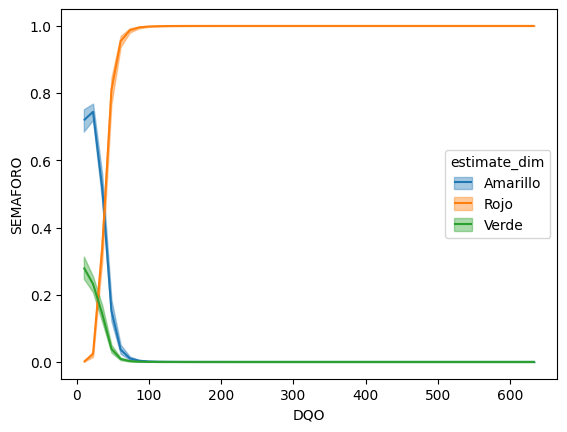

In [ ]:
# Gráfico para model_1
bmb.interpret.plot_predictions(
    model_1,
    fitted_1,
    ['DQO'],
    subplot_kwargs={"main": "DQO", "group": "estimate_dim"}
    )
plt.show()

**Actividad**: Para su modelo seleccionado, grafique cómo el modelo seleccionado hace predicciones basadas en cada una de las variables y según cada categoría de SEMAFORO. Repita el bloque tantas veces como sea necesario para poder ver todas las variables.

In [ ]:
# Gráfico para su modelo y para cada variable del mismo
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

#### Actividad 13

**Actividad**: Lea la explicación de la categorización por semáforos de la norma mexicana en el siguiente link: https://www.gob.mx/conagua/articulos/calidad-del-agua

**Pregunta** ¿Pudo observar lo explicado en los gráficos anteriores? Es decir, ¿su modelo se comporta en forma similar a las definciones de las categorías? Justifique

**Su Respuesta:**

#### Actividad 14

Con el modelo de una variable modelo_1, mostraremos cómo crear una matriz de confusión. Dentro de ese proceso crearemos un dataframe `df_results` con los datos de predicciones y valores reales de categorías para los datos de testeo.

In [ ]:
# Predicciones de modelo_1, usando los datos de df_test
variable = ['DQO']
y_pred = model_1.predict(fitted_1, data=df_test[variable],inplace=False,kind='pps')

y_pps = []
# Posterior Predictiva
for i in range(y_pred.posterior_predictive['SEMAFORO'].shape[-1]):
  y_pps.append(pd.value_counts(y_pred.posterior_predictive['SEMAFORO'][:,:,i].values.reshape((-1))).index[0])

In [ ]:
# Valores reales del DataFrame df_test
y_true = df_test['SEMAFORO']

In [ ]:
# Creamos un nuevo DataFrame
df_results = pd.DataFrame({'Actual': y_true, 'Predicted': y_pps})
df_results['Predicted']= df_results['Predicted'].astype("category")
df_results['Predicted'] =df_results['Predicted'].cat.rename_categories({0:'Amarillo',1:'Rojo',2:'Verde'})
df_results.head()

,Actual,Predicted
0,Verde,Amarillo
1,Amarillo,Amarillo
2,Amarillo,Amarillo
3,Rojo,Rojo
4,Amarillo,Amarillo


In [ ]:
# Calculamos la matriz de confusión
confusion_matrix = pd.crosstab(df_results['Actual'], df_results['Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,Amarillo,Rojo
Actual,,
Amarillo,255,6
Rojo,8,180
Verde,104,1


**Actividad**: Repita lo anterior para su modelo seleccionado

In [ ]:
# Predicciones
# CODIGO DEL ALUMNO ############################################################








################################################################################



# Valores reales
# CODIGO DEL ALUMNO ############################################################

################################################################################



# Creamos un nuevo DataFrame
# CODIGO DEL ALUMNO ############################################################





################################################################################



# Calculamos la matriz de confusión
# CODIGO DEL ALUMNO ############################################################
confusion_matrix2 =
################################################################################
confusion_matrix2

#### Actividad 15

**Actividad**: Utilizando la matriz de confusión (o la tablas `df_results`) calculada anteriormente con el modelo 1 y el de múltiples variables, calcule:

- el porcentaje de muestras de aguas de tipo **verdes** que fueron clasificadas como **no verdes**, es decir, un Falso Negativo de verde (FN) o error de tipo 2.
- el porcentaje de muestras que que efectivamente **no son verdes** pero se identificaron como tales, es decir, un Falso Positivo de verde (FP) o error de tipo 1.


In [ ]:
# Calculamos FN y FP
# CODIGO DEL ALUMNO ############################################################
fn =
fp =
################################################################################
print('Porcentaje de Falsos Negativos (Modelo 1)',round(fn*100,2),'%')
print('Porcentaje de Falsos Positivos (Modelo 1)',round(fp*100,2),'%')

Porcentaje de Falsos Negativos (Modelo 1) 100.0 %
Porcentaje de Falsos Positivos (Modelo 1) 0.0 %


In [ ]:
# Calculamos FN y FP
# CODIGO DEL ALUMNO ############################################################
fn =
fp =
################################################################################
print('Porcentaje de Falsos Negativos (Modelo X)',round(fn*100,2),'%')
print('Porcentaje de Falsos Positivos (Modelo X)',round(fp*100,2),'%')

**NOTA**: Intente obetener un error no mayor al 25% mejorando su mejor modelo de las Actividades 7 a 10

# Impresión del Archivo final (.html)

Para la entrega del TP4, siga los siguientes pasos:
1. Vuelva a correr el Colab desde 0 para asegurar que no haya ningún bug y todo funcione tal como se desea (`Restart session and run all`)
2. Descarge el arcihvo .ipynb en su computadora
3. Utilice el arhivo `ImpresionHTML.ipynb` del campus. Le pedirá subir el arhivo que quiere convertir a html y lo hará por ustedes.

Revisé que está todo como les gusta y ¡ya está listo!